In [6]:
import utils
import pandas as pd
data = utils.read('FODS-A2.csv')

### Function to select the next feature set

In [7]:
def next_feature_set(features, rms):
    min_col = 0

    for i in range(len(rms)):
        if (rms[i] < rms[min_col]):
            min_col=i

    features.pop(min_col)
    return features

In [8]:
rms_test , rms_train = list() , list()
feature_num = list()

### Backward Feature Selection

In [9]:
def backward_elimination(features):

    # features has all the column names being considered for prediction

    n = len(features)

    if (n==2):
        return features

    rms = utils.regression(data[features].copy(),5000,0.00001)
    rms_curr = rms[0]       
    rms_next = []

    rms_test.append(rms[0])
    rms_train.append(rms[1])
    feature_num.append(len(features))

    for f in features:
        df = data[features].copy()

        if (f==df.columns[-1]):
            continue
        
        df = df.drop(f,axis=1)
        rms_next.append(utils.regression(df,5000,0.00001)[0])
    
    if min(rms_next) > rms_curr:
        return features
        
    next_feature_set(features, rms_next)
    return backward_elimination(features)
    

In [10]:
features = list(data.columns)
backward_elimination(features)


['RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'RH_5',
 'T6',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv2',
 'Appliances']

### Tabulation 

In [11]:
row = list()
flist = list()
for i in range(len(rms_train)) :
    train , test = rms_train[i] , rms_test[i]
    features_selected = feature_num[i]
    record = [features_selected - 1 , train , test]
    row.append(record)
    flist.append(features_selected - 1)
table = pd.DataFrame(row , columns=['No of Features selected' , 'Train RMS' , 'Test RMS'])
table

,No of Features selected,Train RMS,Test RMS
0,26,97.389094,93.935186
1,25,97.479512,93.790546
2,24,97.507268,93.699630
3,23,97.509033,93.660533
4,22,97.513845,93.625865
5,21,97.518902,93.614898
6,20,97.518902,93.614898


### Final Model Obtained

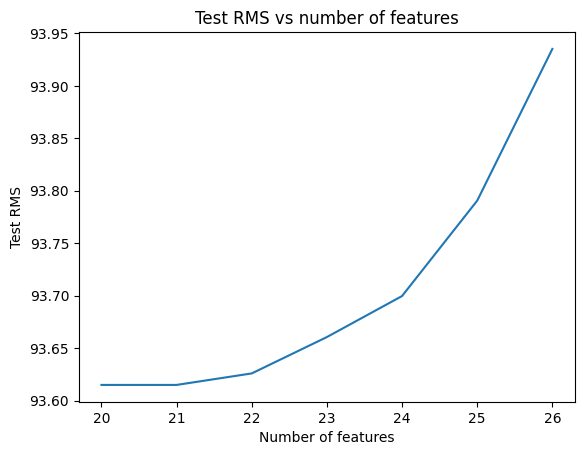

In [12]:
import matplotlib.pyplot as plt
plt.title("Test RMS vs number of features")
plt.xlabel("Number of features")
plt.ylabel("Test RMS")
plt.plot(flist , rms_test)
plt.show()

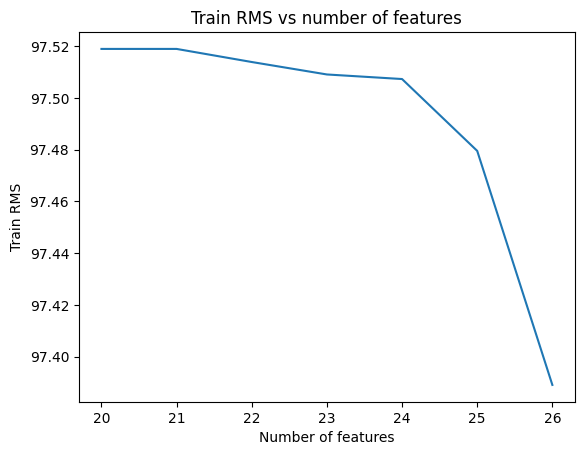

In [13]:
plt.title("Train RMS vs number of features")
plt.xlabel("Number of features")
plt.ylabel("Train RMS")
plt.plot(flist , rms_train )
plt.show()

In [14]:
final_model = utils.regression(data , 10000 , 0.00001)
print(final_model[0])

93.91829821626636


### Final Feature list

In [15]:
features.pop(-1)
print(len(features))
print(features)

20
['RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'RH_5', 'T6', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv2']
